## Bank Churn Prediction

![Customers](https://cdn.substack.com/image/fetch/w_1456,c_limit,f_auto,q_auto:good,fl_lossy/https%3A%2F%2Fbucketeer-e05bbc84-baa3-437e-9518-adb32be77984.s3.amazonaws.com%2Fpublic%2Fimages%2F0ee9bf6a-be36-461f-9b25-dea3ae1ecf5f_400x300.gif "Customers")

### Goal
<font color=blue> <font size="3">Given a Bank customer, build a neural network based classifier that can determine whether they will leave or not in the next 6 months.  </font>

In [92]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
#importing ploting libraries
import matplotlib.pyplot as plt
#importing seaborn for statistical plots
import seaborn as sns
#importing ploting libraries
import matplotlib.pyplot as plt
#styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing the feature scaling library
from sklearn.preprocessing import StandardScaler
#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
# Import Linear Regression, Ridge and Lasso machine learning library
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
# Import ensemble machine learning library
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
# Import support vector regressor machine learning library
from sklearn.svm import SVR
#Import the metrics
from sklearn import metrics
#Import the Voting regressor for Ensemble
from sklearn.ensemble import VotingRegressor
# Import stats from scipy
from scipy import stats
# Import zscore for scaling
from scipy.stats import zscore
#importing the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#importing the K fold
from sklearn.model_selection import KFold
#importing the cross validation score
from sklearn.model_selection import cross_val_score
#importing the preprocessing library
from sklearn import preprocessing
# importing the Polynomial features
from sklearn.preprocessing import PolynomialFeatures
#importing kmeans clustering library
from sklearn.cluster import KMeans
from sklearn.utils import resample
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow.keras import optimizers

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/users/subrotosingh/AIML/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# 2. Meet and Greet the Data

In [5]:
#Read the Dataset

df1=pd.read_csv('/users/subrotosingh/AIML/bank.csv')
df2=df1
df3=df1
df4=df3

In [15]:
df1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [16]:
#Dropping SI No and Customer Key as its not adding value to our analysis
df1 = df1.drop(['RowNumber','CustomerId', 'Surname'], axis=1)

From the above dataset we are removing features('RowNumber','CustomerId','Surname') as this features do not impact the  prediction.



In [17]:
#Check the last few records 

df1.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [12]:
import pandas_profiling
df1.profile_report()

### Exploratory Data Analysis

In [18]:
#Info of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Above gives the details about the number of rows (10000), number of columns (11), data types information are  integers, float and object types . Memory usage is 859.5+ KB. Also,there are no null values in the data.

In [20]:
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [23]:
df1.shape

(10000, 11)

In [42]:
X = df2.iloc[:,3:13].values # Credit Score through Estimated Salary
y = df2.iloc[:, 13].values # Exited
print(X.shape)
print(y.shape)

(10000, 10)
(10000,)


In [43]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [44]:
 #Encoding categorical (string based) data. Country: there are 3 options: France, Spain and Germany
# This will convert those strings into scalar values for analysis
print(X[:8,1], '... will now become: ')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_X_country_encoder = LabelEncoder()
X[:,1] = label_X_country_encoder.fit_transform(X[:,1])
print(X[:8,1])

['France' 'Spain' 'France' 'France' 'Spain' 'Spain' 'France' 'Germany'] ... will now become: 
[0 2 0 0 2 2 0 1]


In [45]:
# We will do the same thing for gender. this will be binary in this dataset
print(X[:6,2], '... will now become: ')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_X_gender_encoder = LabelEncoder()
X[:,2] = label_X_gender_encoder.fit_transform(X[:,2])
print(X[:6,2])

['Female' 'Female' 'Female' 'Female' 'Female' 'Male'] ... will now become: 
[0 0 0 0 0 1]


In [46]:
print(X[:])
print(X.shape)

[[619 0 0 ... 1 1 101348.88]
 [608 2 0 ... 0 1 112542.58]
 [502 0 0 ... 1 0 113931.57]
 ...
 [709 0 0 ... 0 1 42085.58]
 [772 1 1 ... 1 0 92888.52]
 [792 0 0 ... 1 0 38190.78]]
(10000, 10)


In [47]:
# Converting the string features into their own dimensions. Gender doesn't matter here because its binary
countryhotencoder = OneHotEncoder(categorical_features = [1]) # 1 is the country column
X = countryhotencoder.fit_transform(X).toarray()

In [50]:
df5 = X

In [52]:
dataframe = pd.DataFrame.from_records(X)

In [53]:
dataframe #printing the dataframe of X above for visibility

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,0.0,1.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,1.0,0.0,0.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,1.0,0.0,0.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,0.0,1.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,771.0,1.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64
9996,1.0,0.0,0.0,516.0,1.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77
9997,1.0,0.0,0.0,709.0,0.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58
9998,0.0,1.0,0.0,772.0,1.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52


In [54]:
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,850,2,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,0,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,1,Male,42,3,75075.31,2,1,0,92888.52,1


In [55]:
target_0 = df1[df1['Exited'] == 0]['Exited'].count()
target_1 = df1[df1['Exited']== 1]['Exited'].count()
print(target_0,target_1)

7963 2037


No handles with labels found to put in legend.


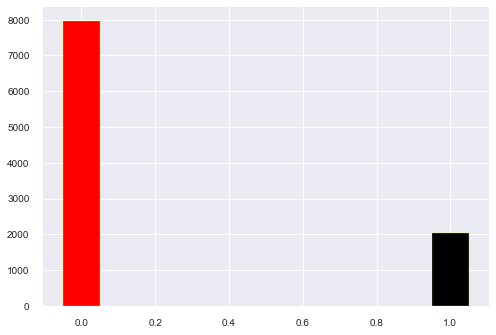

In [56]:
#%matplotlib inline
labels = [0,1]
plt.bar(labels[0],target_0, width=0.1,color = 'red',edgecolor='yellow')
plt.bar(labels[1],target_1,width=0.1,color = 'black',edgecolor='yellow')
plt.legend()

we see that our data is imbalanced, because we have 80% of zeros and we have 20% of ones that may make problems with predication.

In [57]:
df1.describe()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.827529,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,2.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [59]:
df1.isna()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False


In [60]:
#Check for the missing values 
df1.isnull().sum()
#No NULL Values

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [62]:
# corrlation matrix 
cor=df1.corr()
cor

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Age,-0.003965,0.022812,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.035943,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


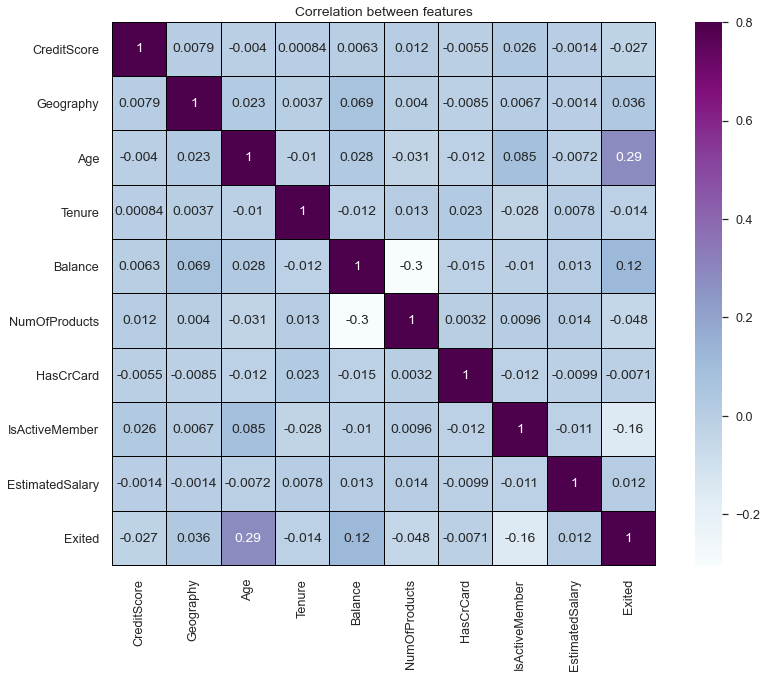

In [63]:
sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(cor, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap="BuPu",linecolor="black")
plt.title('Correlation between features');

we are computing the pairwise correlation between columns because we are having another types in data and we want numbers columns the plot this value to the heatmap to see the correlation.

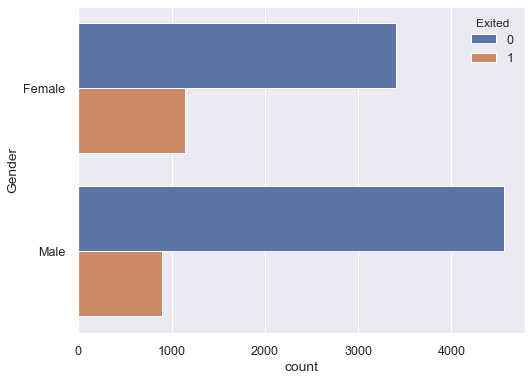

In [73]:
from itertools import chain
countmale = df1[df1['Gender']=='Male']['Gender'].count()
countfemale=df1[df1['Gender']=='Female']['Gender'].count()    
fig,aix = plt.subplots(figsize=(8,6))
#print(countmale)
#print(countfemale)
aix = sns.countplot(hue='Exited',y='Gender',data=df1)

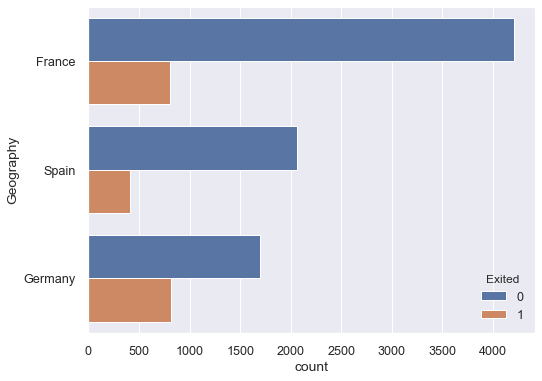

In [76]:
from itertools import chain
countFrance = df3[df3['Geography']=='France']['Geography'].count()
countSpain=df3[df3['Geography']=='Spain']['Geography'].count()
countGermany=df3[df3['Geography']=='Germany']['Geography'].count() 
fig,aix = plt.subplots(figsize=(8,6))
#print(countmale)
#print(countfemale)
aix = sns.countplot(hue='Exited',y='Geography',data=df3)

Spain has the least number of customers who have exited from the bank

In [114]:
cal= df1[df1['IsActiveMember']==1].count()
cal2 = df1[df1['Exited']==1].count()
ave = (cal2/(cal+cal2))*100
va= '%.1f '  % ave[1]
print(va+'%')

28.3 %


The above value  shows 28.3% have exited for the customers who are active members

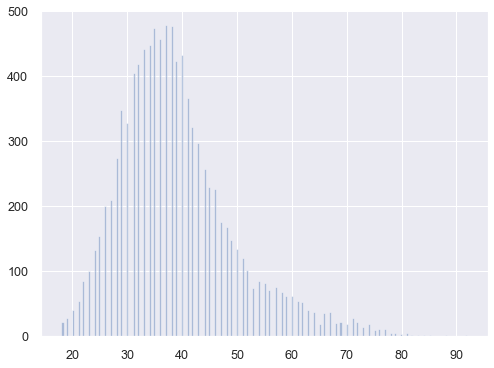

In [69]:
#Distribution in the age
age = np.array(df1['Age'])
fig,axis = plt.subplots(figsize=(8,6))
axis = sns.distplot(age,kde=False,bins=200)

Most banking customers are between the age of 30-50

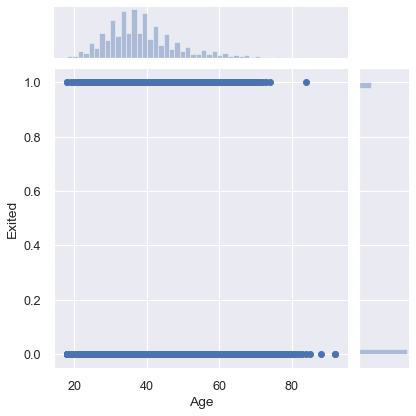

In [71]:
axis = sns.jointplot(x='Age',y='Exited',data = df1)

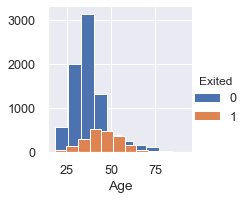

In [72]:
g = sns.FacetGrid(df1,hue = 'Exited')
(g.map(plt.hist,'Age',edgecolor="w").add_legend())

### Splitting the Data

In [77]:
# Splitting the dataset into the Training and Testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [78]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [82]:
X_train.shape



(8000, 12)

In [83]:
X_train


array([[-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
        -1.03227043,  0.32472465]])

###  Initializing the ANN

In [89]:

model = Sequential()

-  Adding layers [layers and activations]
-  Keras layers can be added to the model
-  Adding layers are like stacking lego blocks one by one
- It should be noted that as this is a classification problem, sigmoid layer (softmax for multi-class problems) should be added

In [101]:
classifier.add(Dense(64, input_shape = (12,), activation = 'relu'))
classifier.add(Dense(32, activation = 'tanh'))
classifier.add(Dense(1, activation = 'sigmoid'))

### Model compile [optimizers and loss functions]

Keras model should be "compiled" prior to training

Types of loss (function) and optimizer should be designated


In [93]:
sgd = optimizers.Adam(lr = 0.001)

In [102]:
classifier.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy'])

### Summary of the model

In [103]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                832       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


In [96]:
print(len(X_train))
print(len(y_train))

8000
8000


### Training [Forward pass and Backpropagation]

Training the model

In [107]:
history = classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,validation_split=0.1, verbose = 1)


Train on 7200 samples, validate on 800 samples
Epoch 1/100
7200/7200 [==============================] - 2s 337us/step - loss: 0.0925 - accuracy: 0.9610 - val_loss: 0.4251 - val_accuracy: 0.8775
Epoch 2/100
7200/7200 [==============================] - 2s 310us/step - loss: 0.0709 - accuracy: 0.9746 - val_loss: 0.4634 - val_accuracy: 0.8687
Epoch 3/100
7200/7200 [==============================] - 2s 280us/step - loss: 0.0612 - accuracy: 0.9800 - val_loss: 0.4475 - val_accuracy: 0.8737
Epoch 4/100
7200/7200 [==============================] - 2s 257us/step - loss: 0.0587 - accuracy: 0.9812 - val_loss: 0.4488 - val_accuracy: 0.8700
Epoch 5/100
7200/7200 [==============================] - 1s 208us/step - loss: 0.0588 - accuracy: 0.9818 - val_loss: 0.4541 - val_accuracy: 0.8687
Epoch 6/100
7200/7200 [==============================] - 1s 202us/step - loss: 0.0582 - accuracy: 0.9819 - val_loss: 0.4468 - val_accuracy: 0.8687
Epoch 7/100
7200/7200 [==============================] - 1s 181us/step 

7200/7200 [==============================] - 1s 158us/step - loss: 0.0377 - accuracy: 0.9906 - val_loss: 0.5845 - val_accuracy: 0.8763
Epoch 57/100
7200/7200 [==============================] - 1s 160us/step - loss: 0.0333 - accuracy: 0.9931 - val_loss: 0.6176 - val_accuracy: 0.8675
Epoch 58/100
7200/7200 [==============================] - 1s 158us/step - loss: 0.0356 - accuracy: 0.9907 - val_loss: 0.5753 - val_accuracy: 0.8788
Epoch 59/100
7200/7200 [==============================] - 1s 162us/step - loss: 0.0382 - accuracy: 0.9899 - val_loss: 0.6064 - val_accuracy: 0.8662
Epoch 60/100
7200/7200 [==============================] - 1s 175us/step - loss: 0.0356 - accuracy: 0.9919 - val_loss: 0.6037 - val_accuracy: 0.8637
Epoch 61/100
7200/7200 [==============================] - 1s 190us/step - loss: 0.0389 - accuracy: 0.9894 - val_loss: 0.6229 - val_accuracy: 0.8700
Epoch 62/100
7200/7200 [==============================] - 1s 162us/step - loss: 0.0336 - accuracy: 0.9939 - val_loss: 0.5874 

### Evaluate the accuracy on the train

In [117]:
score_train = classifier.evaluate(X_train, y_train,verbose=1)
print(score_train)

8000/8000 [==============================] - 0s 48us/step
[0.09461834718007595, 0.9827499985694885]


### Testing the NN

##### Predicting the Test set results
This shows the probability of a customer leaving given the testing data. Each row in X_test corresponds to a row in Y_test

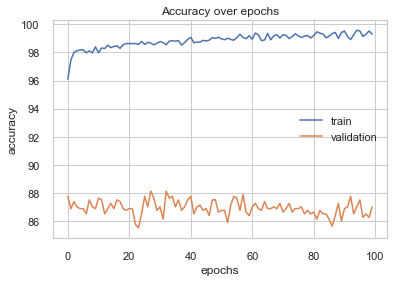

In [108]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

In [109]:
y_pred = classifier.predict(X_test)
print(y_pred)

[[1.5502971e-01]
 [1.7115474e-04]
 [3.8146973e-06]
 ...
 [2.0861626e-06]
 [1.5182793e-03]
 [1.5288591e-05]]


### Predict the results using 0.5 as a threshold 

In [110]:
y_pred = (y_pred > 0.5)
print(y_pred)


[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


### Print the Accuracy score and confusion matrix 

In [111]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1406  189]
 [ 188  217]]


In [112]:
print (((cm[0][0]+cm[1][1])*100)/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]), '% of testing data was classified correctly')

81.15 % of testing data was classified correctly


In [115]:
score = classifier.evaluate(X_test, y_test,verbose=1)

print(score)

2000/2000 [==============================] - 0s 88us/step
[1.3161589003503322, 0.8115000128746033]


In [116]:
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[1.3161589003503322, 0.8115000128746033]
